# Computations using Numpy: Solutions


This notebook is based on the Numpy lesson from [Aalto Scientific Computing: Python for Scientific Computing](https://github.com/AaltoSciComp/python-for-scicomp/) and [W3Schools](https://www.w3schools.com/python/numpy/).

## Contents
- [What is an array?](#What-is-an-array?)
    - [Performance check](#Performance-check)
- [Creating arrays](#Creating-arrays)
- [Array Data types](#Array-Data-types)
- [Saving and loading arrays](#Saving-and-loading-arrays)
- [Array reshaping](#Array-reshaping)
- [Array maths](#Array-maths)
- [Dot product and matrix multiplication](#Dot-product-and-matrix-multiplication)
- [Indexing and Slicing](#Indexing-and-Slicing)
- [View vs copy](#View-vs-copy)
- [Types of operations](#Types-of-operations)
    - [Array methods](#Array-methods)
- [Example: Linear algebra using Numpy](#Example:-Linear-algebra-using-Numpy)
- [More linear algebra and other advanced math](#More-linear-algebra-and-other-advanced-math)
- [Optional Exercises](#Optional-Exercises)
- [See also](#See-also)

## What is an array?

For example, consider `[1, 2.5, 'asdf', False, [1.5, True]]` - this is a Python list but it has different types for every element. When you do math on this, every element has to be handled separately.

Lists may serve the purpose of arrays, but they are slow to process. Numpy aims to provide an array object that is up to 50x faster than traditional Python lists. Numpy is the most used library for scientific computing. Even if you are not using it directly, chances are high that some library uses it in the background.

The array data structure in numpy is called `ndarray`, it provides a lot of supporting functions that make working with `ndarray` very easy.

An array is a ‘grid’ of values, with all the same types. It is indexed by tuples of non negative indices and provides the framework for multiple dimensions. An array has:

- `dtype` - data type. Arrays always contain one type
- `shape` - shape of the data, for example 3×2 or 3×2×500 or even 500 (one dimensional) or [] (zero dimensional).
- `data` - raw data storage in memory. This can be passed to C or Fortran code for efficient calculations.

## Performance check

To quickly show the fast performances of NumPy arrays, we can compare the results of a basic operations using lists and array. In particular we will compute the square of 10000 elements.

We first do this using Python lists, by creating a list with values from 0 to 9999, and one ‘empty’ list, to store the result in.

In [1]:
a = list(range(10000))
b = [ 0 ] * 10000

In [2]:
%%timeit
for i in range(len(a)):
    b[i] = a[i]**2

2.51 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That looks and feels quite fast. But let’s take a look at how NumPy performs for the same task. We first import the `numpy` module, then we create our *a* and *b* containers again, which are now `ndarray` objects. Finally we perform the square operation.

In [3]:
import numpy as np
a = np.arange(10000)
b = np.zeros(10000)

In [4]:
%%timeit
b = a ** 2

3.03 µs ± 39.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


We see that working with numpy arrays provides substantial performance improvements.

> **Note**: To evaluate the time of the computation we used the `%%timeit` command. `%%timeit` is a so-called Jupyter notebook *magic command* which is intiated with a `%` or `%%` prefix for line and cell commands, respectively. This `%%` cell magic has to be the first thing in the Jupyter cell, otherwise it will not work. There are many other interesting magic commands available, such as shown [here](https://towardsdatascience.com/top-8-magic-commands-in-jupyter-notebook-c1582e813560).


## Creating arrays

Arrays can be created using many different functions, this section will provide an overview in the many useful ways in which arrays can be created.

You can create an array from a Python list by using `np.array` and passing a Python list:

>**Note**: To print the values of variables, we will make use of *f-strings*. F-strings have been introduced in Python 3.6, and they are recommended for print formatting since they improve code readability and are less prone to errors. We use f-strings by adding the letter *f* before the string we want to print, and then entering the name of the variables within curly brackets `{` and `}`. More info can be found [here](https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/)

In [5]:
a = np.array([1,2,3])               # 1-dimensional array (rank 1)
b = np.array([[1,2,3],[4,5,6]])     # 2-dimensional array (rank 2)

# the print statements use f-strings to format the print output. 
print(f'a:{a}\n')                                   # \n creates a new line 
print(f'a:\t{a}\n')                                 # \n adds a tab, a specific character for indentation
print(f'b:\n{b}\n')
print(f'shape of a: {a.shape}')                     # the shape (# rows, # columns)
print(f'shape of b: {b.shape}')                     # the shape (# rows, # columns)
print(f'size of a: {a.size}')                       # number of elements in the array b
print(f'size of b: {b.size}')                       # number of elements in the array b

a:[1 2 3]

a:	[1 2 3]

b:
[[1 2 3]
 [4 5 6]]

shape of a: (3,)
shape of b: (2, 3)
size of a: 3
size of b: 6


Often it is useful to create an array with constant values; the following functions can be used to achieve this:

In [6]:
print(np.zeros((2, 3)), '\n')           # Create a 2x3 array with all elements set to 0
print(np.ones((1,2)), '\n')             # Create a 1x2 array with all elements set to 1
print(np.full((2,2),7), '\n')           # Create a 2x2 array with all elements set to 7
print(np.eye(2), '\n')                  # Create a 2x2 identity matrix

[[0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1.]] 

[[7 7]
 [7 7]] 

[[1. 0.]
 [0. 1.]] 



Other common ways to create a vector include using evenly spaced values in an interval or by specifying the data type

In [7]:
a = np.arange(10)              # Evenly spaced values in an interval, with default stepsize 1
b = np.linspace(0,9,10)        # An array with 10 values between 0 and 9  
                               # (check the difference with np.arange in the next section)

c = np.ones((3, 2), bool)      # 3x2 boolean array

print(f'a:\n{a}\n')
print(f'b:\n{b}\n')
print(f'c:\n{c}')

a:
[0 1 2 3 4 5 6 7 8 9]

b:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

c:
[[ True  True]
 [ True  True]
 [ True  True]]


 ---
 ## Array Data types

 What exactly is the difference between `np.arange(10)` and `np.linspace(0,9,10)`? 
 
 - ``np.arange(10)`` results in ``array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])`` with dtype **int64**,
 - while ``np.linspace(0,9,10)`` results in ``array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])`` with dtype **float64**.

 Both ``np.linspace`` and ``np.arange`` take dtype (data type) as an argument and can be adjusted to match each other in that way:

In [8]:
print('As int64:')
print(np.arange(10))
print(np.linspace(0,9,10, dtype=np.int64))
print('\n')

print('As float64:')
print(np.arange(10, dtype=np.float64))
print(np.linspace(0,9,10))

As int64:
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


As float64:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


---
In many occasions (especially when something goes different than expected) it is useful to check and control, or change, the datatype of the array:

In [9]:
d = np.ones((3, 2), bool)

print(f'd:\n{d}\n')
print(f'datatype of d:\n{d.dtype}\n')

e = d.astype(int)
      
print(f'e:\n{e}\n')
print(f'datatype of d:\n{e.dtype}\n')

d:
[[ True  True]
 [ True  True]
 [ True  True]]

datatype of d:
bool

e:
[[1 1]
 [1 1]
 [1 1]]

datatype of d:
int64



When converting floats to integers using `.astype()`, all floats in a numpy array are rounded to the largest integer lower than or equal to the float representation:

In [10]:
nums = np.linspace(0,2,11)
print(f'nums:\n{nums}\n')

numsint = nums.astype(np.int64)
print(f'nums as integer:\n{numsint}\n')

nums:
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]

nums as integer:
[0 0 0 0 0 1 1 1 1 1 2]



Did you notice anything in the previous two cells?

Right! We called the `astype` function not from the `np` module, but from the `ndarray` objects themselves. These are indeed *methods*, rather than *functions*. The main differences are highlighted in the table below.


|Method      | Function|
| :----------- | :-----------|
| is associated with the objects of the class they belong to  | is not associated with any object|
| is called 'on' an object and we cannot invoke it just by its name  | we can invoke a function just by its name.|

Nearly all the method versions do the same thing as the function versions. Choosing the method or the function will usually depend on which one is easier to type or read. Some examples will be provided later in this notebook.

---
### <font color='red'>Exercise</font>

Create an array with elements ranging from 10 up to 15 (inclusive), with data type=unsigned 8 bit integer. 
Use the following functions:
- Creating a python list and converting it to an array using `np.array()`
- using `np.linspace()`
- using `np.arange()`

In [11]:
print(np.array([10, 11, 12, 13, 14, 15], dtype=np.uint8))
print(np.linspace(10, 15, 6, dtype=np.uint8))
print(np.arange(10, 16, 1, dtype=np.uint8))

[10 11 12 13 14 15]
[10 11 12 13 14 15]
[10 11 12 13 14 15]


---
## Saving and loading arrays
When working with arrays, it might be useful to save or load an array to a file on your computer. This can be done using the `np.save()` and `np.load()` functions respectively:

In [12]:
arr = np.linspace(0, 10, 11)  # Create an array
print(f'arr:\n{arr}')

np.save('arr.npy', arr)       # Save the array to a file on your computer
arr = None                    # Setting the arr parameter to None
print(f'arr:\n{arr}')

arr = np.load('arr.npy')      # Load the array from the created .npy file 
print(arr)

arr:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
arr:
None
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


You now saved `arr.npy` such that you can use it later and in different scripts! It is also possible to load csv or txt files using the `np.loadtxt()` function. by passing the correct string representing the delimiter character, a txt or csv file can be loaded as an array:

In [13]:
arr_from_csv = np.loadtxt('example_data.csv', delimiter=',')  # This file uses the comma as the seperating character

arr_from_txt = np.loadtxt('example_data.txt', delimiter='\t') # This file uses a tab as the seperating character

print(f'array from csv file:\n{arr_from_csv}\n')
print(f'array from txt file:\n{arr_from_txt}')

array from csv file:
[[0.1 5. ]
 [0.2 6. ]
 [0.3 5.7]
 [0.4 6.7]
 [0.5 5.8]
 [0.6 4.5]
 [0.7 4.9]
 [0.8 5.6]
 [0.9 5.7]
 [1.  5.3]]

array from txt file:
[[0.1 5. ]
 [0.2 6. ]
 [0.3 5.7]
 [0.4 6.7]
 [0.5 5.8]
 [0.6 4.5]
 [0.7 4.9]
 [0.8 5.6]
 [0.9 5.7]
 [1.  5.3]]


---
### <font color='red'>Exercise</font>

Load the provided csv `taxi_duration.txt` using the `np.loadtxt` function. The text file contains two columns: one representing the day of the year, and the other representing the daily total duration of taxi rides corresponding to the day of the year. Check the number of days in your loaded dataset. You can preview the file in a text editor if you want.

In [14]:
taxis = np.loadtxt('taxi_duration.txt', delimiter=',')
print(f'The dataset is {len(taxis)} days long.')

The dataset is 182 days long.


Now, visualize the dataset by running the cell below

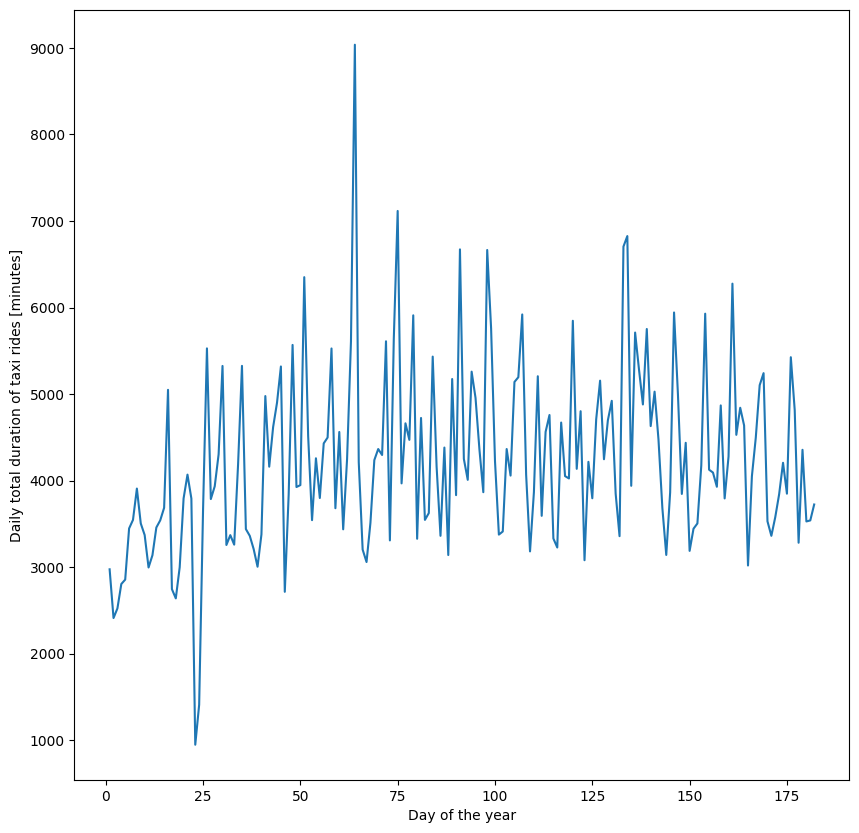

In [15]:
from plotting_functions import plot_taxi_time_series
plot_taxi_time_series(taxis)

---
## Array reshaping
Arrays can be [reshaped](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) in many different ways, as long as the number of entries in the new shape does not differ from the number of entries in the original array. 
For example, the following array can be reshaped into a 3 by 3 array:

<img src="./1dim.png" alt="drawing" width="600"/>

By reshaping this array into a 3 by 3 array using the default reading order, the following array is created:

<img src="./2dim.png" alt="drawindg" style="width:200px;"/>


In [16]:
arr = np.arange(10)
print(f'original:\n{arr}')
print(f'\n5 rows and 2 columns:\n{arr.reshape((5, 2))}')
print(f'\n2 rows and 5 columns:\n{arr.reshape((2, -1))}') # -1 provides the fitting lenght of the dimension
print(f'\n1 row and 5 columns:\n{arr.reshape((1, 5))}')   # This action will cause an error because 
                                                          # 10 entries do not fit in a 1 by 5 array

original:
[0 1 2 3 4 5 6 7 8 9]

5 rows and 2 columns:
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

2 rows and 5 columns:
[[0 1 2 3 4]
 [5 6 7 8 9]]


ValueError: cannot reshape array of size 10 into shape (1,5)

---
### <font color='red'>Exercise</font>

Reshape the Taxi array as loaded in the previous exercise such that the array columns represent weekdays and the array rows represent different weeks in the period of the data set. Note that the first day of the year 2016 was a *friday*, so the week representation in the columns will start at *friday*.

In [17]:
taxi_weeks = np.reshape(taxis[:,1], (-1,7))

A visualization of the reshaped array:

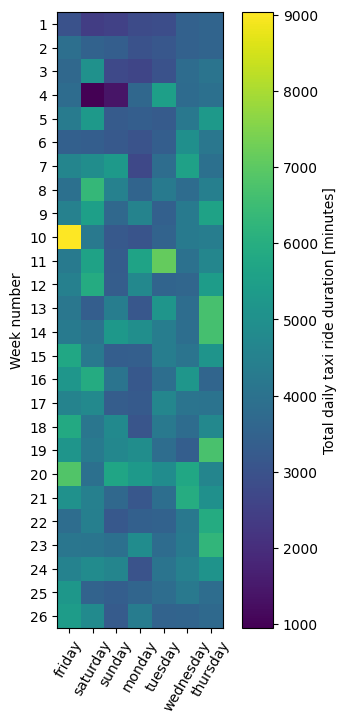

In [18]:
from plotting_functions import plot_taxi_weeks
plot_taxi_weeks(taxi_weeks, labels = ['friday','saturday','sunday','monday','tuesday','wednesday','thursday'])

---
## Array maths


Clearly, you can do math on arrays.  Math in NumPy is fast because it is implemented in C or Fortran, just like in most other high-level languages such as R and Matlab.

By default, in NumPy all math is performed element-by-element. 

In [19]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

c = a + b
d = np.add(a,b)

print('a\n', a, '\n')
print('b:\n', b, '\n')

print('a + b:\n', a + b, '\n')
print('a * b:\n', a * b, '\n')
print('a / b:\n', a / b, '\n')
print('square root of a:\n', np.sqrt(a), '\n')

a
 [[1 2]
 [3 4]] 

b:
 [[5 6]
 [7 8]] 

a + b:
 [[ 6  8]
 [10 12]] 

a * b:
 [[ 5 12]
 [21 32]] 

a / b:
 [[0.2        0.33333333]
 [0.42857143 0.5       ]] 

square root of a:
 [[1.         1.41421356]
 [1.73205081 2.        ]] 



Also the sum or mean an array can be obtained through the `np.mean` and `np.std` functions:

In [20]:
print('sum of a:\n', np.sum(a), '\n')
print('mean of a:\n', np.mean(a), '\n')

sum of a:
 10 

mean of a:
 2.5 




In the above cell we see that `np.sum(a)` provides the sum of all elements in a. If we wish to get the sum per row or per column we can specify the *axis* over which to sum (0 corresponds to rows and 1 corresponds to columns):

In [21]:
a = np.array([[1,2],[3,4]])

print('a\n', a, '\n')
print('sum of a:\n', np.sum(a), '\n')                       # No specified axis
print('sum of a per column:\n', np.sum(a, axis = 0), '\n')  # sum over axis 0
print('sum of a per row:\n', np.sum(a, axis = 1))           # sum over axis 1

a
 [[1 2]
 [3 4]] 

sum of a:
 10 

sum of a per column:
 [4 6] 

sum of a per row:
 [3 7]


---
### <font color='red'>Exercise</font>

Compute the standard deviation of the trip *duration* data, using the following functions: `np.sqrt()`, `np.mean()`, `np.sum()`, `np.size()`, and the mathematical operators `-` and `/`.

The standard deviation is defined as $\sqrt{\frac{\sum^{n}_{i=0} \left( x_i - \bar{x} \right)^2}{n}}$ for a vector x with size n. Compare the result with the usage of the `np.std()` function.

The array to use for this exercise is the `durations` array as defined below, which contains only the Taxi ride durations of the original imported array (no day of the year column)

In [22]:
durations = taxis[:,1]

mean_duration = np.mean(durations)
std_duration = np.sqrt(np.sum((durations - np.mean(durations)) ** 2) / (np.size(durations)))

print(f'Mean duration: {mean_duration}\nStandard deviation of the duration: {std_duration}')

Mean duration: 4232.1373626373625
Standard deviation of the duration: 1050.8897317912347


Next, compute the mean and standard deviation per weekday using the `taxi_weeks` array:
- On which weekday, on average, does the highest taxi ride duration occur?

In [23]:
mean_duration = np.mean(taxi_weeks, axis=0)
std_duration = np.sqrt(np.sum((taxi_weeks - np.mean(taxi_weeks, axis=0)) ** 2, axis=0) / (np.size(taxi_weeks, axis=0)))

print(f'Mean duration: {mean_duration}\nStandard deviation of the duration: {std_duration}')

Mean duration: [4728.07692308 4380.92307692 3753.03846154 3704.61538462 4032.34615385
 4217.61538462 4808.34615385]
Standard deviation of the duration: [1188.99627751 1132.54919822  937.38102756  864.98844265  885.09295219
  696.68793792  995.23893313]


---
## Dot product and matrix multiplication
As we saw in the previous example, the `*` operator or `.multiply()` function performs an element wise multiplication. To perform matrix multiplication, the `@` operator can be used:

In [24]:
a = np.eye(3) * 2
b = np.arange(1,10, dtype=np.float64).reshape((3,3))

print(f'a\n{a}\n') 
print(f'b:\n{b}\n')
print(f'a * b:\n{a * b}\n')               # Element-wise multiplication
print(f'a @ b:\n{a @ b}\n')               # dot product or matrix multiplication
print(f'np.dot(a, b):\n{np.dot(a, b)}\n') # dot product or matrix multiplication

a
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]

b:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

a * b:
[[ 2.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 18.]]

a @ b:
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]

np.dot(a, b):
[[ 2.  4.  6.]
 [ 8. 10. 12.]
 [14. 16. 18.]]



To transpose an array representing a vector or matrix, the `np.transpose()` function can be used. Alternatively, an array can be transposed by accessing its `.T` attribute. 

In [25]:
a = np.arange(6)
a = a.reshape((3,2))                              # a now has 3 rows and 2 columns
print(f'a:\n{a}\n')
print(f'np.transpose(a):\n{np.transpose(a)}\n')   # a now has 2 rows and 3 columns
print(f'a.T:\n{a.T}')                             # a now has 2 rows and 3 columns (same outcome as line above)

a:
[[0 1]
 [2 3]
 [4 5]]

np.transpose(a):
[[0 2 4]
 [1 3 5]]

a.T:
[[0 2 4]
 [1 3 5]]


---
### <font color='red'>Exercise</font>

Create the two matrices A and B as numpy arrays: $A = \begin{bmatrix} 1&4&2\\0&2&1\\3&7&6 \end{bmatrix}$, $B = \begin{bmatrix} 2&0&1\\0&3&0\\1&2&0 \end{bmatrix}$.

Next, perform the following operations:
- Compute $C = A + B$
- Compute $D = A \cdot B$
- Compute $D^T$

In [26]:
A = np.array([[1, 4, 2],
              [0, 2, 1],
              [3, 7, 6]])
B = np.array([[2, 0, 1],
              [0, 3, 0],
              [1, 2, 0]])
C = A + B
D = A @ B
D.T

print(f'{A}\n')
print(f'{B}\n')
print(f'{C}\n')
print(f'{D}\n')

[[1 4 2]
 [0 2 1]
 [3 7 6]]

[[2 0 1]
 [0 3 0]
 [1 2 0]]

[[3 4 3]
 [0 5 1]
 [4 9 6]]

[[ 4 16  1]
 [ 1  8  0]
 [12 33  3]]



## Indexing and Slicing

NumPy has many ways to extract values out of arrays:

- You can select a single element
- You can select rows or columns
- You can select ranges where a condition is true.

An example of some ways of indexing is shown in the following image (credits GeeksForGeeks):

<img src="https://media.geeksforgeeks.org/wp-content/uploads/Numpy1.jpg" alt="indexing" style="width:400px;"/>



Clever and efficient use of these operations is a key to NumPy's speed. 

<font color='red'>Reminder: In python, all indexing starts at zero, so to select the index of the first element in a list or numpy array is represented by a 0!</font>

In [27]:
a = np.arange(16).reshape(4, 4)        # 4x4 matrix from 0 to 15
print(f'a:\n{a}\n')
print(f'a[0]:\n{a[0]}\n')              # first row
print(f'a[:,0]:\n{a[:,0]}\n')          # first column
print(f'a[1:3,1:3]:\n{a[1:3,1:3]}\n')  # middle 2x2 array

print(f'a[(0, 1), (1, 1)]:\n{a[(0, 1), (1, 1)]}')               # second element of first and second row as array

a:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

a[0]:
[0 1 2 3]

a[:,0]:
[ 0  4  8 12]

a[1:3,1:3]:
[[ 5  6]
 [ 9 10]]

a[(0, 1), (1, 1)]:
[1 5]


You can also perform *boolean indexing* on arrays, such as shown below:

In [28]:
print(f'a > 7:\n{a > 7}\n')        # creates boolean matrix of same size as a 
print(f'a[a > 7]:\n{a[a > 7]}\n')  # array with matching values of above criterion

a > 7:
[[False False False False]
 [False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]

a[a > 7]:
[ 8  9 10 11 12 13 14 15]



---
### <font color='red'>Exercise</font>

For the reshaped taxi ride duration array `taxi_weeks`, create the following arrays using slicing:
- An array containing only daily total durations of *fridays* 
- An array containing *monday's* total durations from week 2 up to week 5
- An array containing only entries with a total duration of more than 600 minutes

In [29]:
fridays = taxi_weeks[:,0]
print(fridays)

mondays_week_2_to_5 = taxi_weeks[1:5,3]
print(mondays_week_2_to_5)

total_duration_over_6000 = taxi_weeks[taxi_weeks > 6000]
print(total_duration_over_6000)

[2975. 3908. 3686. 3793. 4304. 3440. 4618. 3948. 4498. 9037. 4296. 4471.
 4161. 4251. 5761. 5195. 4563. 5847. 5155. 6826. 5028. 3846. 4126. 4529.
 5242. 5426.]
[2996. 2639. 3661. 3370.]
[6351. 9037. 7116. 6672. 6665. 6704. 6826. 6276.]


### <font color='red'>Exercise</font>

The reshaped array `taxi_weeks` currently starts on a friday because this is the first day of the year. People often prefer to have the first column of the array corresponding to a monday instead. Using *slicing* and *reshaping*, create a new version of `taxi_weeks` from the `durations` array where the first column represents monday and chronological order is maintained.

> Hint: It is easier if you remove some observations at the beginning and the end because they are not part of a full week of observations.

In [30]:
taxi_weeks_monday = durations[3:-4].reshape(-1,7)

Again, we visualise the result:

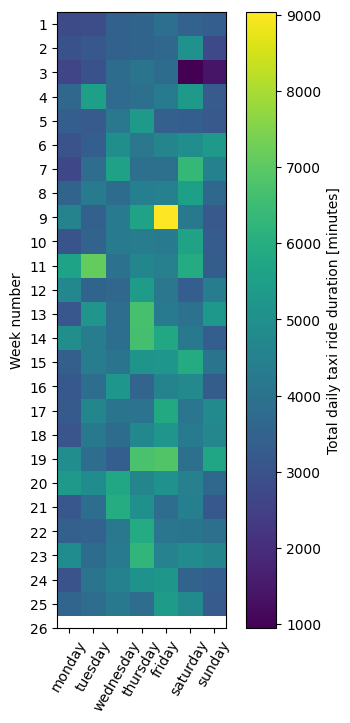

In [31]:
labels = ['monday', 'tuesday', 'wednesday', 'thursday','friday', 'saturday', 'sunday']
plot_taxi_weeks(taxi_weeks_monday,labels)

---
## View vs copy
See the cell below:

In [32]:
a = np.eye(4)         # Create an array
print(f'a:\n{a}\n')   # Print a

b = a[:,0]            # Set variable b as the first column of b
b[0] = 5              # Set all elements in b to 5
print(f'b:\n{b}\n')   # print b

print(f'a:\n{a}\n')   # print a again

a:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

b:
[5. 0. 0. 0.]

a:
[[5. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]



The change in ``b`` has also changed the array ``a``!
This is because ``b`` is merely a *view* of a part of array ``a``.  Both
variables point to the same memory. Hence, if one is changed, the other
one also changes! If you need to keep the original array as is, use `np.copy(a)` or `a.copy()`.

In [33]:
a = np.eye(4)         # Create an array
print(f'a:\n{a}\n')   # Print a 

b = np.copy(a)[:,0]   # Set variable b as a copy of the first column of b
b[0] = 5              # Set all elements in b to 5
print(f'b:\n{b}\n')   # print b

print(f'a:\n{a}\n')   # print a again

a:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

b:
[5. 0. 0. 0.]

a:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]



## Types of operations

There are different types of standard operations in NumPy:

**ufuncs**, or universal functions operats on ndarrays in an element-by-element fashion. They can be *unary*, operating on a single input, or *binary*, operating on two inputs.

They are used to implement vectorization in NumPy which is way faster than iterating over elements. They also provide broadcasting and additional methods like reduce, accumulate etc. that are very helpful for computation.

ufuncs also take additional arguments, like:

`where` boolean array or condition defining where the operations should take place.

`dtype` defining the return type of elements.

`out` output array where the return value should be copied.

A thorough explanation and list of ufunc is available at [W3Schools](https://www.w3schools.com/python/numpy/numpy_ufunc.asp)

There are ufunc equivalents for Python's native arithmetic operators, e.g., the standard addition, subtraction, multiplication, division, negation, exponentiation, and so on. The ufunc however allows for more control, for instance we can use the `out` argument to specify the array where the result of the calculation will be stored (rather than creating a temporary array). This turns out to be particularly useful for large computations.

Example: in-place addition. Create an array, add it to itself using a ufunc.

In [34]:
x = np.array([1, 2, 3])

print(f'x before addition: {x}')
print(f'id before addition: {id(x)}')    # get the memory-ID of x
np.add(x, x, x)                          # Third argument is output array
np.add(x, x, x)
print(f'x after addition: {x}')
print(f'id after addition: {id(x)}')     # get the memory-ID of x
                                         # - notice  it is the same!

x before addition: [1 2 3]
id before addition: 4429787856
x after addition: [ 4  8 12]
id after addition: 4429787856


Example: broadcasting.  Can you add a 1-dimensional array of shape `(3)`
  to an 2-dimensional array of shape `(3, 2)`?   With broadcasting you
  can, and most of the times it happens 'under the hood'.

In [35]:
a = np.array([[1, 2, 3],
             [4, 5, 6]])
print(f'a:\n{a}\n')                         # Print a 

b = np.array([10, 10, 10])
print(f'b:\n{b}\n')                         # Print b

print(f'np.add(a, b):\n{np.add(a, b)}\n')   # add arrays a and b

a:
[[1 2 3]
 [4 5 6]]

b:
[10 10 10]

np.add(a, b):
[[11 12 13]
 [14 15 16]]



Broadcasting is smart and consistent about what it does. The basics of broadcasting are [documented here](https://numpy.org/doc/stable/user/basics.broadcasting.html). The basic idea is that it expands dimensions of the smaller array so that they are compatible in shape.

### Array methods
Array methods also implement useful operations, sometimes similar to the ufuncs.

Remember that array methods are called on the `ndarray` object. You can find the full list of methods [here](https://numpy.org/doc/stable/reference/arrays.ndarray.html) along with all other important informations on `ndarray`.  

In [36]:
x = np.arange(12)
x.shape = (3, 4)
x                    #  array([[ 0,  1,  2,  3],
                     #         [ 4,  5,  6,  7],
                     #         [ 8,  9, 10, 11]])
x.max()              #  11

11

## Example: Linear algebra using Numpy

In this short example, we will solve a linear system of equations using numpy. 

Let's say we want to fit a polynomial $y = a_0 x^2 + a_1 x + a_2$ through the points $(1,0)$, $(2,2)$, and $(3,1)$.
We can obtain the variables $a_0$, $a_1$, and $a_2$ by solving the folowing linear system of equations:

$\begin{bmatrix} 1 & 1 & 1\\ 4 & 2 & 1\\ 9 & 3 & 1 \end{bmatrix} \begin{bmatrix} a_0\\ a_1\\ a_2 \end{bmatrix} = \begin{bmatrix} 0\\ 2\\ 1 \end{bmatrix}$

If we want to solve a simple system of linear equations in the form of $\mathbf{A}\mathbf{x} = \mathbf{b}$, when given A and b. If A is invertable, then this equation can be solved by inverting rearranging the matrix and vectors: $\mathbf{A}^{-1}\mathbf{b} = \mathbf{x}$

In [37]:
A = np.array([[1, 1, 1], 
              [4, 2, 1], 
              [9, 3, 1]])
b = np.array([0, 2, 1]).T

x = np.linalg.inv(A) @ b

print(f'A:\n{A}\n')
print(f'b:\n{b}\n')
print(f'x:\n{x}\n')

A:
[[1 1 1]
 [4 2 1]
 [9 3 1]]

b:
[0 2 1]

x:
[-1.5  6.5 -5. ]



Checking the specified conditions:

In [38]:
a0, a1, a2 = x    

print(f'a0 * 1**2 + a1 * 1 + a2 = {a0 * 1**2 + a1 * 1 + a2:.2f}')  # Check solution at x = 1
print(f'a0 * 2**2 + a1 * 2 + a2 = {a0 * 2**2 + a1 * 2 + a2:.2f}')  # Check solution at x = 2
print(f'a0 * 3**2 + a1 * 3 + a2 = {a0 * 3**2 + a1 * 3 + a2:.2f}')  # Check solution at x = 3

a0 * 1**2 + a1 * 1 + a2 = -0.00
a0 * 2**2 + a1 * 2 + a2 = 2.00
a0 * 3**2 + a1 * 3 + a2 = 1.00


It can be seen that the solution is nearly correct... The values of used in these calculations are floats, which cannnot represent every number exactly. Therefore, when performing calculations, the outcome might differ by a very small amount in the order of 1e-15 times the magnitude of the number.

---
Alternatively, we could have used the `np.linalg.solve()` function to solve the equation $\mathbf{A}\mathbf{x} = \mathbf{b}$ given **A** and **b**:

In [39]:
x = np.linalg.solve(A, b)
print(x)

[-1.5  6.5 -5. ]


---
Another way of obtaining the parameters of a polynomial fitted to a number of coordinates (utilizing the least squares method) is through the `np.polyfit()` function, where the x and y coordinates of the coordinates must be passed in two seperate arrays:

In [40]:
coordinates = np.array([[1, 0], # Define an array containing the required coordinates
                        [2, 2],
                        [3, 1]])

x =  np.polyfit(coordinates[:,0], coordinates[:,1], deg=2) # Use the np.polyfit function specifying the coordinates and the degree of polynomial
print(x)

[-1.5  6.5 -5. ]


---
This shows that there are always multiple options to tackling a poblem using numpy, and for a lot of scenarios there is likely already a numpy function which can be used to reduce the amount of code needed to perform a task.

## More linear algebra and other advanced math

In general, you use `arrays` (n-dimensions), not `matrixes`
(specialized 2-dimensional) in NumPy.

Internally, NumPy doesn't invent its own math routines: it relies on
[BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms)
and [LAPACK](https://en.wikipedia.org/wiki/LAPACK) to do this kind
of math - the same as many other languages.

- [Linear algebra in numpy documentation](https://numpy.org/doc/stable/reference/routines.linalg.html)

- [Scipy](https://docs.scipy.org/doc/scipy/reference/) has
  more usful functions

- Many other libraries use NumPy arrays as the standard data
  structure: they take data in this format, and return it similarly.
  Thus, all the other packages you may want to use are compatible


## Optional Exercises

   If you have extra time, try these out.

   1. Reverse a vector: given a vector, reverse it such that the last
      element becomes the first, e.g. ``[1, 2, 3]`` => ``[3, 2, 1]``

   2. Create a 2D array with zeros on the borders and 1 inside.

   3. Create a random array of length 20 with elements [0, 1), then add 10 to all
      elements in the range [0.2, 0.7).

   4. What is `np.round(0.5)`? What is ``np.round(1.5)``? Why?

   5. In addition to ``np.round``, explore `numpy.ceil`, `numpy.floor`,
      `numpy.trunc`. In particular, take note of how they behave with
      negative numbers.

   6. Recall the identity $sin^2(x) + cos^2(x) = 1$. Create a
      random 4x4 array with values in the range [0, 10). Now test the
      equality with `numpy.equal`. What result do you get with
      `numpy.allclose` instead of ``np.equal``?

   7. Create a 1D array with 10 random elements. Sort it.

   8. What's the difference between `np_array.sort()` and
      `np.sort(np_array)`?

   9. For the random array in question 8, instead of sorting it, perform
      an indirect sort. That is, return the list of indices which would
      index the array in sorted order.

   10. Create a 4x4 array of zeros, and another 4x4 array of ones. Next
       combine them into a single 8x4 array with the content of the zeros
       array on top and the ones on the bottom.  Finally, do the same,
       but create a 4x8 array with the zeros on the left and the ones on
       the right.

In [41]:
# Answer for Ex. 1
a = np.array([1, 2, 3, 4, 5])
a = a[::-1]
print(f'a:\n{a}')

a:
[5 4 3 2 1]


In [42]:
# Answer for Ex. 2

b = np.ones((10,10))
b[:,[0, -1]]=0
b[[0, -1],:]=0
print(b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [43]:
# Answer for Ex. 3
# YOUR SOLUTION MAY BE DIFFERENT IF YOU USE A DIFFERENT SEED
np.random.seed(42)

c = np.random.rand(1, 20)
d = np.where(np.logical_and(c >= 0.2, c < 0.7), c + 10, c)
print(d)

[[10.37454012  0.95071431  0.73199394 10.59865848  0.15601864  0.15599452
   0.05808361  0.86617615 10.60111501  0.70807258  0.02058449  0.96990985
   0.83244264 10.21233911  0.18182497  0.18340451 10.30424224 10.52475643
  10.43194502 10.29122914]]


In [44]:
# Answer for Ex. 4
print(np.round(0.5))
print(np.round(1.5))
# The reason is that numpy rounds to the nearest even number
# according to https://numpy.org/doc/stable/reference/generated/numpy.around.html#numpy.around

0.0
2.0


In [45]:
# Answer for Ex. 5

a = np.array([-3.3, -2.5, -1.5, -0.75, -0.5, 0.5, 0.75, 1.5, 2.5, 3])
print('round',np.round(a))
print('ceil ',np.ceil(a))
print('floor',np.floor(a))
print('trunc',np.trunc(a))

round [-3. -2. -2. -1. -0.  0.  1.  2.  2.  3.]
ceil  [-3. -2. -1. -0. -0.  1.  1.  2.  3.  3.]
floor [-4. -3. -2. -1. -1.  0.  0.  1.  2.  3.]
trunc [-3. -2. -1. -0. -0.  0.  0.  1.  2.  3.]


In [46]:
# Answer for Ex. 6
# YOUR SOLUTION MAY BE DIFFERENT IF YOU USE A DIFFERENT SEED
np.random.seed(42)
x = 10*np.random.rand(4,4)

oo = np.ones((4,4))
s2c2 = np.square(np.sin(x))+np.square(np.cos(x))
np.equal(oo,s2c2)
np.allclose(oo,s2c2)

True

In [47]:
# Answer for Ex. 7
# YOUR SOLUTION MAY BE DIFFERENT IF YOU USE A DIFFERENT SEED
np.random.seed(42)
x = np.random.rand(10)
print(x)
x.sort()
print(x)

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
[0.05808361 0.15599452 0.15601864 0.37454012 0.59865848 0.60111501
 0.70807258 0.73199394 0.86617615 0.95071431]


In [48]:
# Answer for Ex. 8

# NumPy.sort() returns a sorted copy of an array.

In [49]:
# Answer for Ex. 9
# YOUR SOLUTION MAY BE DIFFERENT IF YOU USE A DIFFERENT SEED
np.random.seed(42)

x = np.random.rand(10)
print(np.argsort(x))

[6 5 4 0 3 8 9 2 7 1]


In [50]:
# Answer for Ex. 10.

z = np.zeros((4,4))
o = np.ones((4,4))
print(np.concatenate((z,o)))
print(np.concatenate((z,o),axis=1))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]]


## See also


* NumPy manual <https://numpy.org/doc/stable/reference/>`
* Basic array class reference <https://numpy.org/doc/stable/reference/arrays.html>
* Indexing <https://numpy.org/doc/stable/reference/arrays.indexing.html>`
* ufuncs <https://numpy.org/doc/stable/reference/ufuncs.html>`
* 2020 Nature paper on NumPy's role and basic concepts <https://www.nature.com/articles/s41586-020-2649-2>`